In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [4]:
from google.colab import drive 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
loans = pd.read_csv('/content/gdrive/My Drive/Lending Capstone Project/accepted_2007_to_2018Q4.csv.gz')  

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#making the column transformations  

years = loans['emp_length'] 
years = years.str.extract(r'(\d+)') 
loans['emp_length'] = [float(x) for x in years[0]]
loans['year_issued'] = pd.to_datetime(loans['issue_d']).dt.year
loans['month_issued'] = pd.to_datetime(loans['issue_d']).dt.month  
loans['loan_status'] = loans['loan_status'].str.replace('Does not meet the credit policy. Status:', '') 
terms = loans['term'] 
terms = terms.str.extract(r'(\d+)')
loans['term'] = [float(x) for x in terms[0]] 
times = (pd.to_datetime(loans['last_pymnt_d']) - pd.to_datetime(loans['issue_d'])) / np.timedelta64(1, 'M') 
loans['loan_duration'] = times.round()
loans['profits'] = (loans['total_pymnt'] - loans['loan_amnt']) / loans['loan_amnt'] 

In [7]:
finished_loans = loans.loc[(loans.loan_status == 'Charged Off') | (loans.loan_status == 'Fully Paid') | (loans.loan_status == 'Default')] 

In [62]:
AB_loans = finished_loans.loc[(finished_loans.grade == 'A') | (finished_loans.grade == 'B')]

In [65]:
CD_loans['sub_grade'].value_counts()

B4    83276
B5    82639
B3    81901
B2    74080
B1    71206
A5    64056
A4    52255
A1    43682
A3    38010
A2    37190
Name: sub_grade, dtype: int64

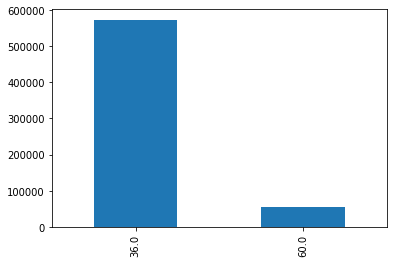

In [10]:
CD_loans['term'].value_counts().plot(kind = 'bar')

In [11]:
#begin importing the sklearn modules for transforming & feature scaling here 
#columns we are not looking at are issued date 
CD_loans = CD_loans[['annual_inc', 'application_type', 'dti', 'issue_d', 'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'home_ownership', 'inq_fi', 'inq_last_12m', 'installment', 'int_rate', 'loan_amnt', 'open_acc', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'tax_liens', 'total_acc', 'revol_bal', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'loan_status']]

In [12]:
CD_loans.isna().mean()

annual_inc                     0.000006
application_type               0.000000
dti                            0.000202
issue_d                        0.000000
earliest_cr_line               0.000033
emp_length                     0.056375
fico_range_high                0.000000
fico_range_low                 0.000000
funded_amnt                    0.000000
home_ownership                 0.000000
inq_fi                         0.602951
inq_last_12m                   0.602952
installment                    0.000000
int_rate                       0.000000
loan_amnt                      0.000000
open_acc                       0.000033
percent_bc_gt_75               0.050621
pub_rec                        0.000033
pub_rec_bankruptcies           0.000734
purpose                        0.000000
sub_grade                      0.000000
tax_liens                      0.000083
total_acc                      0.000033
revol_bal                      0.000000
delinq_amnt                    0.000033


In [13]:
D = (pd.to_datetime(CD_loans['issue_d']) - pd.to_datetime(CD_loans['earliest_cr_line'])) / np.timedelta64(1, 'Y') 
CD_loans['cr_yeargap'] = D.round() 

In [14]:
CD_loans['loan_status'] = CD_loans['loan_status'].str.replace("Default", "Charged Off")

In [15]:
CD_loans['avg_fico_score'] = (CD_loans['fico_range_low'] + CD_loans['fico_range_high']) / 2

In [16]:
CD_loans['mths_since_last_delinq'].fillna(-999, inplace = True) 
CD_loans['mths_since_last_major_derog'].fillna(-999, inplace = True) 
CD_loans['inq_fi'].fillna(-999, inplace = True)  
CD_loans['inq_last_12m'].fillna(-999, inplace = True) 
CD_loans['percent_bc_gt_75'].fillna(-999, inplace = True)
CD_loans['emp_length'].fillna(-999, inplace = True) 
CD_loans['dti'].fillna(-999, inplace = True) 
CD_loans['delinq_amnt'].fillna(-999, inplace = True) 
CD_loans['delinq_2yrs'].fillna(-999, inplace = True) 
CD_loans['cr_yeargap'].fillna(-999, inplace = True)
CD_loans['tax_liens'].fillna(-999, inplace = True) 
CD_loans['pub_rec'].fillna(-999, inplace = True) 
CD_loans['pub_rec_bankruptcies'].fillna(-999, inplace = True) 
CD_loans['open_acc'].fillna(-999, inplace = True)

In [17]:
#CD_loans = CD_loans.drop('title', axis = 1)
CD_loans['total_acc'].fillna(-999, inplace = True) 
CD_loans['earliest_cr_line'].fillna(-999, inplace = True) 


In [18]:
CD_loans = CD_loans.dropna(subset= ['annual_inc'])
CD_loans.isna().sum()

annual_inc                     0
application_type               0
dti                            0
issue_d                        0
earliest_cr_line               0
emp_length                     0
fico_range_high                0
fico_range_low                 0
funded_amnt                    0
home_ownership                 0
inq_fi                         0
inq_last_12m                   0
installment                    0
int_rate                       0
loan_amnt                      0
open_acc                       0
percent_bc_gt_75               0
pub_rec                        0
pub_rec_bankruptcies           0
purpose                        0
sub_grade                      0
tax_liens                      0
total_acc                      0
revol_bal                      0
delinq_amnt                    0
delinq_2yrs                    0
mths_since_last_delinq         0
mths_since_last_major_derog    0
loan_status                    0
cr_yeargap                     0
avg_fico_s

In [19]:
CD_loans[['home_ownership', 'application_type', 'purpose', 'sub_grade']] =  CD_loans[['home_ownership', 'application_type', 'purpose', 'sub_grade']].astype('category')


In [20]:
CD_loans['home_ownership_cat'] =  CD_loans['home_ownership'].cat.codes 
CD_loans['application_type_cat'] = CD_loans['application_type'].cat.codes 
CD_loans['purpose_cat'] = CD_loans['purpose'].cat.codes 
CD_loans['sub_grade_cat'] = CD_loans['sub_grade'].cat.codes

In [21]:
CD_loans.head()

,annual_inc,application_type,dti,issue_d,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_fi,inq_last_12m,installment,int_rate,loan_amnt,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,sub_grade,tax_liens,total_acc,revol_bal,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_major_derog,loan_status,cr_yeargap,avg_fico_score,home_ownership_cat,application_type_cat,purpose_cat,sub_grade_cat
2,63000.0,Joint App,10.78,Dec-2015,Aug-2000,10.0,699.0,695.0,20000.0,MORTGAGE,2.0,1.0,432.66,10.78,20000.0,6.0,50.0,0.0,0.0,home_improvement,B4,0.0,18.0,7869.0,0.0,0.0,-999.0,-999.0,Fully Paid,15.0,697.0,1,1,4,8
6,180000.0,Individual,14.67,Dec-2015,Jun-1990,10.0,684.0,680.0,20000.0,MORTGAGE,1.0,1.0,637.58,9.17,20000.0,12.0,100.0,0.0,0.0,debt_consolidation,B2,0.0,27.0,87329.0,0.0,0.0,49.0,-999.0,Fully Paid,26.0,682.0,1,0,2,6
7,85000.0,Individual,17.61,Dec-2015,Feb-1999,10.0,709.0,705.0,20000.0,MORTGAGE,1.0,2.0,631.26,8.49,20000.0,8.0,0.0,0.0,0.0,major_purchase,B1,0.0,15.0,826.0,0.0,1.0,3.0,3.0,Fully Paid,17.0,707.0,1,0,6,5
8,85000.0,Individual,13.07,Dec-2015,Apr-2002,6.0,689.0,685.0,10000.0,RENT,2.0,1.0,306.45,6.49,10000.0,14.0,28.6,1.0,1.0,credit_card,A2,0.0,23.0,10464.0,0.0,0.0,-999.0,-999.0,Fully Paid,14.0,687.0,5,0,1,1
9,42000.0,Individual,34.80,Dec-2015,Nov-1994,10.0,704.0,700.0,8000.0,MORTGAGE,0.0,1.0,263.74,11.48,8000.0,8.0,33.3,0.0,0.0,credit_card,B5,0.0,18.0,7034.0,0.0,0.0,75.0,75.0,Fully Paid,21.0,702.0,1,0,1,9


In [22]:
CD_loans['loan_status'] = (CD_loans["loan_status"] == "Charged Off").astype(np.int)
#CD_loans = CD_loans.drop(['issue_d', 'earliest_cr_line', 'loan_status', 'fico_range_high', 'fico_range_low', 
#                        'home_ownership', 'application_type', 'purpose', 'sub_grade'], axis = 1) 

In [23]:
CD_loans.head()

,annual_inc,application_type,dti,issue_d,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_fi,inq_last_12m,installment,int_rate,loan_amnt,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,sub_grade,tax_liens,total_acc,revol_bal,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_major_derog,loan_status,cr_yeargap,avg_fico_score,home_ownership_cat,application_type_cat,purpose_cat,sub_grade_cat
2,63000.0,Joint App,10.78,Dec-2015,Aug-2000,10.0,699.0,695.0,20000.0,MORTGAGE,2.0,1.0,432.66,10.78,20000.0,6.0,50.0,0.0,0.0,home_improvement,B4,0.0,18.0,7869.0,0.0,0.0,-999.0,-999.0,0,15.0,697.0,1,1,4,8
6,180000.0,Individual,14.67,Dec-2015,Jun-1990,10.0,684.0,680.0,20000.0,MORTGAGE,1.0,1.0,637.58,9.17,20000.0,12.0,100.0,0.0,0.0,debt_consolidation,B2,0.0,27.0,87329.0,0.0,0.0,49.0,-999.0,0,26.0,682.0,1,0,2,6
7,85000.0,Individual,17.61,Dec-2015,Feb-1999,10.0,709.0,705.0,20000.0,MORTGAGE,1.0,2.0,631.26,8.49,20000.0,8.0,0.0,0.0,0.0,major_purchase,B1,0.0,15.0,826.0,0.0,1.0,3.0,3.0,0,17.0,707.0,1,0,6,5
8,85000.0,Individual,13.07,Dec-2015,Apr-2002,6.0,689.0,685.0,10000.0,RENT,2.0,1.0,306.45,6.49,10000.0,14.0,28.6,1.0,1.0,credit_card,A2,0.0,23.0,10464.0,0.0,0.0,-999.0,-999.0,0,14.0,687.0,5,0,1,1
9,42000.0,Individual,34.80,Dec-2015,Nov-1994,10.0,704.0,700.0,8000.0,MORTGAGE,0.0,1.0,263.74,11.48,8000.0,8.0,33.3,0.0,0.0,credit_card,B5,0.0,18.0,7034.0,0.0,0.0,75.0,75.0,0,21.0,702.0,1,0,1,9


In [24]:
CD_loans = CD_loans.drop(['issue_d', 'earliest_cr_line', 'fico_range_high', 'fico_range_low', 
                        'home_ownership', 'application_type', 'purpose', 'sub_grade'], axis = 1) 

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score  

train_data, test_data = train_test_split(CD_loans, train_size = 0.7, test_size= 0.3, random_state = 42, stratify= CD_loans['sub_grade_cat'])

In [26]:
train_data['loan_status'].sum()

46785

In [27]:
train_data.shape

(439803, 27)

In [71]:
from sklearn.utils import resample 

train_0 = train_data[train_data.sub_grade_cat == 0]
train_1 = train_data[train_data.sub_grade_cat == 1]
train_2 = train_data[train_data.sub_grade_cat == 2]
train_3 = train_data[train_data.sub_grade_cat == 3]
train_4 = train_data[train_data.sub_grade_cat == 4]
train_5 = train_data[train_data.sub_grade_cat == 5]
train_6 = train_data[train_data.sub_grade_cat == 6]
train_7 = train_data[train_data.sub_grade_cat == 7]
train_8 = train_data[train_data.sub_grade_cat == 8]
train_9 = train_data[train_data.sub_grade_cat == 9]

train_0_re = resample(train_0, replace = False, n_samples = 20000, random_state = 42)
train_1_re = resample(train_1, replace = False, n_samples = 20000, random_state = 42)
train_2_re = resample(train_2, replace = False, n_samples = 20000, random_state = 42)
train_3_re = resample(train_3, replace = False, n_samples = 20000, random_state = 42)
train_4_re = resample(train_4, replace = False, n_samples = 20000, random_state = 42)
train_5_re = resample(train_5, replace = False, n_samples = 20000, random_state = 42)
train_6_re = resample(train_6, replace = False, n_samples = 20000, random_state = 42)
train_7_re = resample(train_7, replace = False, n_samples = 20000, random_state = 42)
train_8_re = resample(train_8, replace = False, n_samples = 20000, random_state = 42)
train_9_re = resample(train_9, replace = False, n_samples = 20000, random_state = 42)  

train_0_re['loan_status']

train_data_re = pd.concat([train_0_re, train_1_re, train_2_re, train_3_re, train_4_re, train_5_re, train_6_re, train_7_re, train_8_re, train_9_re])

train_data_re['sub_grade_cat'].value_counts()

9    20000
8    20000
7    20000
6    20000
5    20000
4    20000
3    20000
2    20000
1    20000
0    20000
Name: sub_grade_cat, dtype: int64

In [84]:
train_0_re['loan_status'].value_counts()[0] 

19364

In [87]:
train_0_re['loan_status'].value_counts() 
prac_D = train_0_re.loc[train_0_re.loan_status == 1] 
prac_F = train_0_re.loc[train_0_re.loan_status == 0] 
D = resample(prac_D, replace = True, n_samples = train_0_re['loan_status'].value_counts()[0]) 
DF = pd.concat([D, prac_F]) 
DF['loan_status'].value_counts

(38728, 27)

In [147]:
train_0_min = train_0_re.loc[train_0_re.loan_status == 1] 
train_0_maj = train_0_re.loc[train_0_re.loan_status == 0] 
train_0_min_up = resample(train_0_min, replace = True, n_samples = train_0_re['loan_status'].value_counts()[0]) 
train_0_reup = pd.concat([train_0_min_up, train_0_maj])  

train_1_min = train_1_re.loc[train_1_re.loan_status == 1] 
train_1_maj = train_1_re.loc[train_1_re.loan_status == 0] 
train_1_min_up = resample(train_1_min, replace = True, n_samples = train_1_re['loan_status'].value_counts()[0]) 
train_1_reup = pd.concat([train_1_min_up, train_1_maj])

train_2_min = train_2_re.loc[train_2_re.loan_status == 1] 
train_2_maj = train_2_re.loc[train_2_re.loan_status == 0] 
train_2_min_up = resample(train_2_min, replace = True, n_samples = train_2_re['loan_status'].value_counts()[0]) 
train_2_reup = pd.concat([train_2_min_up, train_2_maj])

train_3_min = train_3_re.loc[train_3_re.loan_status == 1] 
train_3_maj = train_3_re.loc[train_3_re.loan_status == 0] 
train_3_min_up = resample(train_3_min, replace = True, n_samples = train_3_re['loan_status'].value_counts()[0]) 
train_3_reup = pd.concat([train_3_min_up, train_3_maj])

train_4_min = train_4_re.loc[train_4_re.loan_status == 1] 
train_4_maj = train_4_re.loc[train_4_re.loan_status == 0] 
train_4_min_up = resample(train_4_min, replace = True, n_samples = train_4_re['loan_status'].value_counts()[0]) 
train_4_reup = pd.concat([train_4_min_up, train_4_maj])

train_5_min = train_5_re.loc[train_5_re.loan_status == 1] 
train_5_maj = train_5_re.loc[train_5_re.loan_status == 0] 
train_5_min_up = resample(train_5_min, replace = True, n_samples = train_5_re['loan_status'].value_counts()[0]) 
train_5_reup = pd.concat([train_5_min_up, train_5_maj]) 


train_6_min = train_6_re.loc[train_6_re.loan_status == 1] 
train_6_maj = train_6_re.loc[train_6_re.loan_status == 0] 
train_6_min_up = resample(train_6_min, replace = True, n_samples = train_6_re['loan_status'].value_counts()[0]) 
train_6_reup = pd.concat([train_6_min_up, train_6_maj])

train_7_min = train_7_re.loc[train_7_re.loan_status == 1] 
train_7_maj = train_7_re.loc[train_7_re.loan_status == 0] 
train_7_min_up = resample(train_7_min, replace = True, n_samples = train_7_re['loan_status'].value_counts()[0]) 
train_7_reup = pd.concat([train_7_min_up, train_7_maj])

train_8_min = train_8_re.loc[train_8_re.loan_status == 1] 
train_8_maj = train_8_re.loc[train_8_re.loan_status == 0] 
train_8_min_up = resample(train_8_min, replace = True, n_samples = train_8_re['loan_status'].value_counts()[0]) 
train_8_reup = pd.concat([train_8_min_up, train_8_maj])

train_9_min = train_9_re.loc[train_9_re.loan_status == 1] 
train_9_maj = train_9_re.loc[train_9_re.loan_status == 0] 
train_9_min_up = resample(train_9_min, replace = True, n_samples = train_9_re['loan_status'].value_counts()[0]) 
train_9_reup = pd.concat([train_9_min_up, train_9_maj])

In [148]:
train_data_upd = pd.concat([train_0_reup, train_1_reup, train_2_reup, train_3_reup, train_4_reup, train_5_reup, train_6_reup, train_7_reup, train_8_reup, train_9_reup])

In [149]:
train_data_upd.groupby('sub_grade_cat')['loan_status'].value_counts()

sub_grade_cat  loan_status
0              0              19364
               1              19364
1              0              19063
               1              19063
2              0              18901
               1              18901
3              0              18691
               1              18691
4              0              18279
               1              18279
5              0              17880
               1              17880
6              0              17704
               1              17704
7              0              17419
               1              17419
8              0              16968
               1              16968
9              0              16650
               1              16650
Name: loan_status, dtype: int64

In [150]:
train_7_reup['loan_status'].value_counts()

1    17419
0    17419
Name: loan_status, dtype: int64

In [146]:
train_7_min['loan_status'].sum()

2581

In [102]:
D['loan_status'].value_counts()

1    180919
0    180919
Name: loan_status, dtype: int64

In [151]:
#Final resampling 
#We have made the upsampled dataset now we have to go about resampling again with respect to each sub grade to ensure the same amount 

#making the sub_group datasets
train_0_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 0]
train_1_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 1]
train_2_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 2]
train_3_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 3]
train_4_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 4]
train_5_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 5]
train_6_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 6]
train_7_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 7]
train_8_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 8]
train_9_upd = train_data_upd.loc[train_data_upd.sub_grade_cat == 9] 



#Taking 15000 samples from each sub grade group from each loan status 
train_0_min = train_0_upd.loc[train_0_upd.loan_status == 1] 
train_0_maj = train_0_upd.loc[train_0_upd.loan_status == 0] 
train_0_mins = resample(train_0_min, replace = False, n_samples = 15000)  
train_0_majs = resample(train_0_maj, replace = False, n_samples = 15000 )
train_0_scaled = pd.concat([train_0_mins, train_0_majs])   

train_1_min = train_1_upd.loc[train_1_upd.loan_status == 1] 
train_1_maj = train_1_upd.loc[train_1_upd.loan_status == 0] 
train_1_mins = resample(train_1_min, replace = False, n_samples = 15000)  
train_1_majs = resample(train_1_maj, replace = False, n_samples = 15000 )
train_1_scaled = pd.concat([train_1_mins, train_1_majs]) 

train_2_min = train_2_upd.loc[train_2_upd.loan_status == 1] 
train_2_maj = train_2_upd.loc[train_2_upd.loan_status == 0] 
train_2_mins = resample(train_2_min, replace = False, n_samples = 15000)  
train_2_majs = resample(train_2_maj, replace = False, n_samples = 15000 )
train_2_scaled = pd.concat([train_2_mins, train_2_majs]) 

train_3_min = train_3_upd.loc[train_3_upd.loan_status == 1] 
train_3_maj = train_3_upd.loc[train_3_upd.loan_status == 0] 
train_3_mins = resample(train_3_min, replace = False, n_samples = 15000)  
train_3_majs = resample(train_3_maj, replace = False, n_samples = 15000 )
train_3_scaled = pd.concat([train_3_mins, train_3_majs]) 

train_4_min = train_4_upd.loc[train_4_upd.loan_status == 1] 
train_4_maj = train_4_upd.loc[train_4_upd.loan_status == 0] 
train_4_mins = resample(train_4_min, replace = False, n_samples = 15000)  
train_4_majs = resample(train_4_maj, replace = False, n_samples = 15000 )
train_4_scaled = pd.concat([train_4_mins, train_4_majs]) 

train_5_min = train_5_upd.loc[train_5_upd.loan_status == 1] 
train_5_maj = train_5_upd.loc[train_5_upd.loan_status == 0] 
train_5_mins = resample(train_5_min, replace = False, n_samples = 15000)  
train_5_majs = resample(train_5_maj, replace = False, n_samples = 15000 )
train_5_scaled = pd.concat([train_5_mins, train_5_majs]) 

train_6_min = train_6_upd.loc[train_6_upd.loan_status == 1] 
train_6_maj = train_6_upd.loc[train_6_upd.loan_status == 0] 
train_6_mins = resample(train_6_min, replace = False, n_samples = 15000)  
train_6_majs = resample(train_6_maj, replace = False, n_samples = 15000 )
train_6_scaled = pd.concat([train_6_mins, train_6_majs]) 

train_7_min = train_7_upd.loc[train_7_upd.loan_status == 1] 
train_7_maj = train_7_upd.loc[train_7_upd.loan_status == 0] 
train_7_mins = resample(train_7_min, replace = False, n_samples = 15000)  
train_7_majs = resample(train_7_maj, replace = False, n_samples = 15000 )
train_7_scaled = pd.concat([train_7_mins, train_7_majs]) 

train_8_min = train_8_upd.loc[train_8_upd.loan_status == 1] 
train_8_maj = train_8_upd.loc[train_8_upd.loan_status == 0] 
train_8_mins = resample(train_8_min, replace = False, n_samples = 15000)  
train_8_majs = resample(train_8_maj, replace = False, n_samples = 15000 )
train_8_scaled = pd.concat([train_8_mins, train_8_majs]) 

train_9_min = train_9_upd.loc[train_9_upd.loan_status == 1] 
train_9_maj = train_9_upd.loc[train_9_upd.loan_status == 0] 
train_9_mins = resample(train_9_min, replace = False, n_samples = 15000)  
train_9_majs = resample(train_9_maj, replace = False, n_samples = 15000 )
train_9_scaled = pd.concat([train_9_mins, train_9_majs]) 

train_data_scaled = pd.concat([train_0_scaled, train_1_scaled, train_2_scaled, train_3_scaled, train_4_scaled, train_5_scaled, train_6_scaled, train_7_scaled, train_8_scaled, train_9_scaled])

In [153]:
train_data_scaled['sub_grade_cat'].value_counts()

9    30000
8    30000
7    30000
6    30000
5    30000
4    30000
3    30000
2    30000
1    30000
0    30000
Name: sub_grade_cat, dtype: int64

In [154]:
train_feats = train_data_scaled.drop('loan_status', axis = 1)
train_labels = train_data_scaled['loan_status']

In [156]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_score 
GBC = GradientBoostingClassifier() 
%time cross_val_score(GBC, train_feats, train_labels, cv = 3, scoring='precision')

CPU times: user 3min 9s, sys: 149 ms, total: 3min 9s
Wall time: 3min 10s


array([0.63972766, 0.5803009 , 0.57195929])

In [160]:
GBC = GradientBoostingClassifier(learning_rate=0.2, n_estimators=500, max_depth=4, subsample=0.5) 

%time cross_val_score(GBC, train_feats, train_labels, cv = 2, scoring='accuracy')

CPU times: user 5min 45s, sys: 591 ms, total: 5min 46s
Wall time: 5min 47s


array([0.52824667, 0.5295    ])

In [50]:
GBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=8000, max_depth=2, subsample=0.3, max_features=10) 
%time cross_val_score(GBC, train_feats, train_labels, cv = 3, scoring='recall')

CPU times: user 13min 16s, sys: 3.85 s, total: 13min 20s
Wall time: 13min 21s


array([0.63142033, 0.62725232, 0.62949663])

In [ ]:
test_feats = test_data.drop('loan_status', axis = 1) 
test_labels = test_data['loan_status']

In [162]:
GBC = GradientBoostingClassifier(learning_rate=0.2, n_estimators=500, max_depth=2, subsample=0.8, max_features=15) 
%time GBC.fit(train_feats, train_labels) 

CPU times: user 3min 6s, sys: 475 ms, total: 3min 6s
Wall time: 3min 7s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [165]:
GBC.score(train_feats, train_labels)
GBC.score(test_feats, test_labels)

0.6131477865964942

In [56]:
#Looking at XGBoost

In [169]:
import xgboost as xgb 
xgb_clf = xgb.XGBClassifier(n_estimators = 1000, learning_rate= 0.15, random_state= 42)  

%time cross_val_score(xgb_clf, train_feats, train_labels, cv = 2, scoring= 'accuracy')

CPU times: user 4min 38s, sys: 192 ms, total: 4min 39s
Wall time: 4min 39s


array([0.53083333, 0.54286   ])